# Introduction to pandas


## Motivation

So far, we have encountered built-in Python containers (`list`, `tuple`, `dict`) 
and NumPy arrays as the only way to store data.
However, while NumPy arrays are great for storing *homogenous* data
without any particular structure, they are somewhat limited when
we want to use them for data analysis.

For example, we usually want to process data sets with

1.  several variables;
2.  multiple observations, which need not be identical across
    variables (some values may be missing);
3.  non-homogenous data types: for examples,
    names need to be stored as strings, birthdays as dates and income as
    a floating-point number.

While NumPy can in principle handle such situations, it puts all the
burden on the user. Most users would prefer to not have to deal
with such low-level details.

Pandas was created to offer more versatile data structures that are
straightforward to use for storing, manipulating and analyzing
heterogeneous data:

1.  Data is clearly organized in *variables* and *observations*, similar
    to econometrics programs such as Stata and R using `data.frame`.

2.  Each variable is permitted to have a *different* data type.

3.  We can use *labels* to select observations instead of having to use
    a linear numerical index as with NumPy.

    We could, for example, index a data set using National Insurance Numbers
    or time stamps for time series data.

4.  Pandas offers many convenient data aggregation and reduction
    routines that can be applied to subsets of data.

    For example, we can easily group observations by city and compute average
    incomes.

5.  Pandas also offers many convenient data import / export functions that
    go beyond what's in NumPy.

Should we be using pandas at all times, then? No!

-   For low-level tasks where performance is essential, use NumPy.
-   For homogenous data without any particular data structure, use NumPy.
-   On the other hand, if data is heterogeneous, needs to be imported from
    an external data source and cleaned or transformed before
    performing computations, use pandas.

There are numerous tutorials on pandas on the internet.
Useful additional material includes:

-   The official [user guide](https://pandas.pydata.org/docs/user_guide/index.html).
-   The official [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
    which nicely illustrates the most frequently used operations.
-   The official [API reference](https://pandas.pydata.org/docs/reference/index.html) with details on
    every pandas object and function.
-   There are numerous tutorials (including videos) available
    on the internet. See [here](https://pandas.pydata.org/docs/getting_started/tutorials.html)
    for a list.

***
## Creating pandas data structures

Pandas has two main data structures:

1.  [`Series`](https://pandas.pydata.org/docs/reference/series.html) 
    represents observations of a *single* variable.
2.  [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) 
    is a container for *several* variables. You can think
    of each individual column of a `DataFrame` as a `Series`,
    and each row represents one observation.

The easiest way to create a `Series` or `DataFrame` is to create
them from pre-existing data.

To access pandas data structures and routines, we need to import them first.
The near-universal convention is to make pandas available using the name `pd`:
```python
import pandas as pd
```

*Example: Create Series from 1-dimensional NumPy array*

In [51]:
import numpy as np
import pandas as pd             # universal convention: import using pd

data = np.arange(5, 10)

# Create pandas Series from 1d array
s = pd.Series(data)

print(s)

0    5
1    6
2    7
3    8
4    9
dtype: int64


*Example: Create DataFrame from NumPy array*

We can create a `DataFrame` from a NumPy array:

In [52]:
# Create matrix of data
data = np.arange(15).reshape((-1, 3))

# Define variable (or column) names
varnames = ['A', 'B', 'C']

# Define variable (or column) names
rownames = ['A', 'B', 'C', 'D', 'E']

# Create pandas DataFrame from matrix
pd.DataFrame(data, columns=varnames, index=rownames)

,A,B,C
A,0,1,2
B,3,4,5
C,6,7,8
D,9,10,11
E,12,13,14


This code creates a `DataFrame` of three variables called `A`, `B` and `C`
with 5 observations each.

*Example: Create DataFrame from dictionary*

Alternatively, we can create a `DataFrame` from non-homogenous data as follows:

In [53]:
# Names (strings)
names = ['Alice', 'Bob']

# Birth dates (datetime objects)
bdates = pd.to_datetime(['1985-01-01', '1997-05-12'])

# Incomes (floats)
incomes = np.array([600000, np.nan])         # code missing income as NaN

# create DataFrame from dictionary
pd.DataFrame({'Name': names, 'Birthdate': bdates, 'Income': incomes})

,Name,Birthdate,Income
0,Alice,1985-01-01,600000.0
1,Bob,1997-05-12,NaN


If data types differ across columns, as in the above example,
it is often convenient to create the `DataFrame` by passing
a dictionary as an argument. Each key represents a column name
and each corresponding value contains the data for that variable.

***
## Importing data

### Loading data with NumPy & its limitations

We often use files that store data
as text files containing character-separated values (CSV) since virtually
any application supports this data format.
The most important functions to read text data are:

-   [`np.loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html):     load data from a text file.
-   [`np.genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html): 
    load data from a text file and handle missing data.

There are a few other input/output functions in NumPy, for example to
write arrays as raw binary data.
We won't cover them here, but you can find them in the
[official documentation](https://numpy.org/doc/stable/reference/routines.io.html).

*Example: Load character-separated text data*

Consider the following tabular data from [FRED](https://fred.stlouisfed.org/) stored in the file 
[FRED_annual.csv](../../data/FRED/FRED_annual.csv) where the first two rows
look as follows:

| Year |  GDP   |  CPI | UNRATE | FEDFUNDS | INFLATION |
| ---- | ------ | ---- | ------ | -------- | --------- |
| 1954 | 2877.7 | 26.9 | 5.6    | 1.0      |           |
| 1955 | 3083.0 | 26.8 | 4.4    | 1.8      | -0.4      |

Note that the inflation column does has a missing value for the year 1954.

These data are stored as character-separated values (CSV).
To load this CSV file as a NumPy array, we use [`loadtxt()`]((https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). 
It is advantageous to globally set the path to the `data/` directory that can point either to the local directory or to the `data/` directory on GitHub.

In [54]:
# Uncomment this to use files in the local data/ directory
DATA_PATH = '../../data'

# Load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/FIE463-V25/main/data'

In [55]:
import numpy as np

# Path to CSV file
file = f'{DATA_PATH}/FRED/FRED_annual.csv'

# load CSV, skip header row and first row with missing data
data = np.loadtxt(file, skiprows=2, delimiter=',')

data[:2]        # Display first two rows

array([[ 1.9550e+03,  3.0830e+03,  2.6800e+01,  4.4000e+00,  1.8000e+00,
        -4.0000e-01],
       [ 1.9560e+03,  3.1488e+03,  2.7200e+01,  4.1000e+00,  2.7000e+00,
         1.5000e+00]])

The default settings will in many cases be appropriate to load
whatever CSV file we might have. However, we'll occasionally
want to specify the following arguments to override the defaults:

-   `delimiter`: Character used to separate individual fields (default: space).
-   `skiprows=n`: Skip the first `n` rows. For example, if the CSV file
    contains a header with variable names, `skiprows=1` needs to be
    specified as NumPy by default cannot process these names.
-   `encoding`: Set the character encoding of the input data. This
    is usually not needed, but can be required to import data
    with non-latin characters that are not encoded using Unicode.

While `loadtxt()` is simple to use, it quickly reaches its limits
with more complex data sets.
For example, when we try to load the FRED data set including the first data row, we get the following error:

In [56]:
# Attempt to load CSV
data = np.loadtxt(file, skiprows=1, delimiter=',')

ValueError: could not convert string '' to float64 at row 0, column 6.

This code fails because `loadtxt()` does not support files with missing values. One can use the more flexible function [`np.genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) which allows us to parse files with missing values:

In [ ]:
# Load CSV file using genfromtxt() instead of loadtxt()
data = np.genfromtxt(file, skip_header=True, delimiter=',')

# Display first rows
data[:1]

array([[1.9540e+03, 2.8777e+03, 2.6900e+01, 5.6000e+00, 1.0000e+00,
               nan]])

However, it is usually not worthwhile to figure out how to load complex data with NumPy as this is much easier with pandas.

***
### Loading data with Pandas

Pandas's input/output routines are more powerful than those implemented in NumPy:

-   They support reading and writing numerous file formats.
-   They support heterogeneous data without having to specify
    the data type in advance.
-   They gracefully handle missing values.

For these reasons, it is often preferable to directly use pandas to
process data instead of NumPy.

The most important functions are:

-   [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), 
    [`to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html): 
    Read or write CSV text files.
-   [`read_fwf()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html): 
    Read data with fixed field widths, i.e., text data
    that does not use delimiters to separate fields.
-   [`read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), 
    [`to_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html): 
    Read or write Excel spreadsheets.
-   [`read_stata()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_stata.html), 
    [`to_stata()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_stata.html): 
    Read or write Stata's `.dta` files.

For a complete list of I/O routines, see the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

To illustrate, we repeat the above examples using pandas's
[`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):

In [ ]:
import pandas as pd

# Path to CSV file
file = f'{DATA_PATH}/FRED/FRED_annual.csv'

df = pd.read_csv(file, sep=',') # sep is the delimiter
df.head(2)          # Display the first 2 rows of data

,Year,GDP,CPI,UNRATE,FEDFUNDS,INFLATION
0,1954,2877.7,26.9,5.6,1.0,NaN
1,1955,3083.0,26.8,4.4,1.8,-0.4


<div class="alert alert-info">
<h3> Your turn</h3>
Use the pandas functions listed above to import data from the following files located in the <TT>data</TT> folder:
<ol>
    <li>titanic.csv</li>
    <li>FRED/FRED_annual.xlsx</li>
</ol>

To load Excel files, you need to have the package <TT>openpyxl</TT> installed.
</div>

In [ ]:
file_1 = f'{DATA_PATH}/titanic.csv'

df = pd.read_csv(file_1, sep=',') # sep is the delimiter
df.head(2)          # Display the first

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C


In [ ]:
file_2 = f'{DATA_PATH}/FRED/FRED_annual.xlsx'

df_2 = pd.read_excel(file_2)

df_2.head(2)          # Display the first 2 rows of data

,Year,GDP,CPI,UNRATE,FEDFUNDS,INFLATION
0,1954,2877.7,26.9,5.6,1.0,NaN
1,1955,3083.0,26.8,4.4,1.8,-0.371747


***
## Viewing data

With large data sets, you hardly ever want to print the entire `DataFrame`.
Pandas by default limits the amount of data shown. You can
use the [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) 
and [`tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) 
methods to explicitly display a specific
number of rows from the top or the end of a `DataFrame`.

To illustrate, we use a data set of passengers on board of the Titanic's
maiden voyage stored in `titanic.csv` which contains the following columns:

1.  `PassengerId`
2.  `Survived`: indicator whether the person survived
3.  `Pclass`: accommodation class (first, second, third)
4.  `Name`: Name of passenger (last name, first name)
5.  `Sex`: `male` or `female`
6.  `Age`
7.  `Ticket`: Ticket number
8.  `Fare`: Fare in pounds
9.  `Cabin`: Deck + cabin number
10. `Embarked`: Port at which passenger embarked:
    `C` - Cherbourg, `Q` - Queenstown, `S` - Southampton

We can read in the data stored in the file `titanic.csv` like this:

In [ ]:
import pandas as pd

# URL to CSV file in GitHub repository
file = f'{DATA_PATH}/titanic.csv'

# Load sample data set of Titanic passengers. Individual fields are separated
# using a comma, which is the default.
df = pd.read_csv(file, sep=',')

We can now display the first and last three rows:

In [ ]:
df.head(3)      # show first three rows

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df.info()       # show data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [ ]:
df.tail(3)      # show last three rows

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,370376,7.75,NaN,Q


To quickly compute some descriptive statistics for the
*numerical* variables in the `DataFrame`, we use 
[`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html):

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


Note that this automatically ignores the columns `Name`, `Sex`, `Ticket`
and `Cabin` as they contain strings, and computing the mean, standard deviation, etc.
of a string variable does not make sense.

For categorical data, we can use 
[`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
to tabulate the number of unique values of a variable. For example, the following code tabulates passengers by sex:

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Lastly, to see low-level information about the data type
used in each column and the number of non-missing observations, we call 
[`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html):

In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


Pandas automatically discards missing information
in computations. For example, the age column has several missing values, 
so the number of reported `Non-Null` values is lower than for the other columns.

***
## Indexing

Pandas supports two types of indexing:

1.  Indexing by position. This is basically identical to the
    indexing of other Python and NumPy containers.
2.  Indexing by label, i.e., by the values assigned to the row or column index.
    These labels need not be integers in increasing order, as is the case
    for NumPy.
    We will see how to assign labels below.

Pandas indexing is performed either by using brackets `[]`, or by using
`.loc[]` for label indexing, or `.iloc[]` for positional indexing.

Indexing via `[]` can be somewhat confusing:

-   specifying `df['name']` returns the column `name` as a `Series` object.
-   On the other hand, specifying a range such as `df[5:10]` returns the *rows*
    associated with the *positions* 5,...,9.

*Example: Selecting columns*

In [ ]:
import pandas as pd

# Set option to limit the number of rows displayed
pd.set_option('display.max_rows', 10)

# Load sample data of Titanic passengers
df = pd.read_csv(f'{DATA_PATH}/titanic.csv')
df['Name']               # select a single column

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                          Graham, Miss Margaret Edith
888              Johnston, Miss Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df[['Name', 'Sex']]     # select multiple columns using a list

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss Margaret Edith",female
888,"Johnston, Miss Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


Note: In order to select multiple columns you *must* specify these as a `list`, not a `tuple`.

*Example: Selecting rows by position*

To return the rows at positions 1, 2 and 3 we use

In [ ]:
df[1:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S


Pandas follows the Python convention that indices are 0-based, and the
endpoint of a slice is not included.

### Creating and manipulating indices

Pandas uses *labels* to index and align
data. These can be integer values starting at 0 with increments of 1
for each additional element, which is the default, but they need not be.
The three main methods to create/manipulate indices are:

1.   Create a new `Series` or `DataFrame` object with a custom index
    using the `index` argument.
2.   [`set_index(keys=['column1', ...])`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
    uses the values of `column1`
    and optionally additional columns as indices, discarding the current index.
3.   [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) 
    resets the index to its default value, a sequence
    of increasing integers starting at 0.

#### Creating custom indices

First, consider the following code which creates a `Series` with 
three elements `[10, 20, 30]` using the default index `[0, 1, 2]`:

In [ ]:
import pandas as pd

# Create Series with default integer index
pd.Series([10, 20, 30])

0    10
1    20
2    30
dtype: int64

We can use the `index` argument to specify a custom index, for example
one containing the lower-case characters `a`, `b`, `c` as follows:

In [ ]:
# Create Series with custom index [a, b, c]
pd.Series([10, 20, 30], index=['a', 'b', 'c'])

a    10
b    20
c    30
dtype: int64

#### Manipulating indices

To modify the index of an *existing* `Series` or `DataFrame` object, 
we use the methods
[`set_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
and
[`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html).
Note that these return a new object and leave the original `Series` or `DataFrame`
unchanged. If we want to change the existing object, we need
to pass the argument `inplace=True`.

For example, we can replace the row index and use the Roman lower-case
 characters `a`, `b`, `c`, ... as labels
instead of integers:

In [ ]:
# Create DataFrame with 2 columns
df = pd.DataFrame({'A': [10, 20, 30], 'B': ['a', 'b', 'c']})

df

,A,B
0,10,a
1,20,b
2,30,c


Since we did not specify any index, the default index $[0, 1, ...]$ is used. 
We can use [`set_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
set the index to the values from a column, for example column `B`:

In [ ]:
# Use column 'B' as index, store result in new DataFrame
df2 = df.set_index('B')

# Display updated DataFrame
df2

,A
B,
a,10
b,20
c,30


Note that pandas operations are usually not in place, so only `df2` uses column `B` as the index, whereas the original `df` remains unchanged:

In [ ]:
df

,A,B
0,10,a
1,20,b
2,30,c


We can use the `inplace=True` argument to `set_index()` to update the index in-place, even though the pandas project usually does not encourage users to change things in place:

In [ ]:
# Set index in-place, i.e., df is modified
df.set_index('B', inplace=True)

df

,A
B,
a,10
b,20
c,30


Importantly, when changing things in-place, pandas functions usually don't return anything (the return value is `None`), so it is a mistake to attempt to assign the return value to a variable.

We can now use these new labels to select records in the `DataFrame`:

In [ ]:
# print first 2 rows using labels
df['a':'b']             # This is the same as df[:2]

,A
B,
a,10
b,20


Note that when specifying a range in terms of
labels, the last element *is* included! Hence the row with index `c`
in the above example is shown.

We can reset the index to its default integer values using
the `reset_index()` method:

In [ ]:
# Reset index labels to default value (integers 0, 1, 2, ...) and print 
# first three rows
df.reset_index(drop=True).head(3)

,A
0,10
1,20
2,30


The `drop=True` argument tells pandas to throw away the old index
values instead of storing them as a column of the resulting `DataFrame`.

<div class="alert alert-info">
<h3> Your turn</h3>
Read in the following data files from the <TT>data/FRED</TT> folder and manipulate the dataframe index:
<ol>
    <li>Read in the file <TT>FRED_annual.csv</TT> and set the column <TT>Year</TT> as the index.</li>
    <li>Read in the file <TT>FRED_monthly.csv</TT> and set the columns <TT>Year</TT> and <TT>Month</TT> as the index</li>
</ol>
Experiment what happens if you use the <TT>inplace=True</TT> and <TT>append=True</TT> options of <TT>set_index()</TT>.

Restore the original (default) index after you are done.
</div>

In [ ]:
FRED_annual = pd.read_csv(f'{DATA_PATH}/FRED/FRED_annual.csv')
FRED_monthly = pd.read_csv(f'{DATA_PATH}/FRED/FRED_monthly.csv')

df_A = pd.read_csv(f'{DATA_PATH}/FRED/FRED_annual.csv')
df_B = pd.read_csv(f'{DATA_PATH}/FRED/FRED_monthly.csv')

In [57]:
df_A.head(2)

,Year,GDP,CPI,UNRATE,FEDFUNDS,INFLATION
0,1954,2877.7,26.9,5.6,1.0,NaN
1,1955,3083.0,26.8,4.4,1.8,-0.4


In [31]:
df_B.head(2)

,Year,Month,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
0,1948,1,23.7,3.4,NaN,NaN,58.6
1,1948,2,23.7,3.8,NaN,NaN,58.9


In [32]:
# Set index to 'Year' in both DataFrames
df_A.set_index('Year', inplace=True)
df_B.set_index(['Year', 'Month'], inplace=True)

In [33]:
df_A.head(2)

,GDP,CPI,UNRATE,FEDFUNDS,INFLATION
Year,,,,,
1954,2877.7,26.9,5.6,1.0,NaN
1955,3083.0,26.8,4.4,1.8,-0.4


In [59]:
df_B.head(2)

,Year,Month,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
0,1948,1,23.7,3.4,NaN,NaN,58.6
1,1948,2,23.7,3.8,NaN,NaN,58.9


In [60]:
# Reset index in both DataFrames
df_A.reset_index(inplace=True)
df_B.reset_index(inplace=True)

In [61]:
df_A.head(2)

,index,Year,GDP,CPI,UNRATE,FEDFUNDS,INFLATION
0,0,1954,2877.7,26.9,5.6,1.0,NaN
1,1,1955,3083.0,26.8,4.4,1.8,-0.4


In [62]:
df_B.head(2)

,index,Year,Month,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
0,0,1948,1,23.7,3.4,NaN,NaN,58.6
1,1,1948,2,23.7,3.8,NaN,NaN,58.9


### Selecting elements

To more clearly distinguish between selection by label and by position,
pandas provides the [`.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) and 
[`.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) methods of indexing.
To make your intention obvious, you should therefore adhere to the following
rules:

1.  Use `df['name']` only to select *columns* and nothing else.
2.  Use `.loc[]` to select by label.
3.  Use `.iloc[]` to select by position.

**Selection by label**

To illustrate, using `.loc[]` unambiguously indexes by label. First we create a demo data set with 3 columns and 5 rows:

In [66]:
# Create demo data with 3 columns and 5 rows

# Column labels
columns = ['X', 'Y', 'Z']
# Row labels
rows = ['a', 'b', 'c', 'd', 'e']

values = np.arange(len(rows))

# Create data dictionary
data = {col: [f'{col}{val}' for val in values] for col in columns}

# Create DataFrame from dictionary
df = pd.DataFrame(data, index=rows)
df

,X,Y,Z
a,X0,Y0,Z0
b,X1,Y1,Z1
c,X2,Y2,Z2
d,X3,Y3,Z3
e,X4,Y4,Z4


We now use `.loc[]` to select rows and columns by label:

In [64]:
# Select rows 'b' to 'e', and columns 'X' and 'Y'
df.loc["b":"e", ["X", "Y"]]

,X,Y
b,X1,Y1
c,X2,Y2
d,X3,Y3
e,X4,Y4


With `.loc[]` we can even perform slicing on column names, which
is not possible with the simpler `df[]` syntax:

In [67]:
df.loc['b':'e', 'X':'Z']

,X,Y,Z
b,X1,Y1,Z1
c,X2,Y2,Z2
d,X3,Y3,Z3
e,X4,Y4,Z4


This includes all the columns between `X` and `Z`,
where the latter is included since we are slicing by label.

Trying to pass in positional arguments will return an error for
the given `DataFrame` since the index labels are `a`, `b`, `c`,...
and not 0, 1, 2...

In [68]:
df.loc[0:4]

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

However, we can reset the index to its default value. Then
the index labels are integers and coincide with their position,
so that `.loc[]` works:

In [69]:
df = df.reset_index(drop=True)      # reset index labels to integers,
                                    # drop original index
df.loc[0:4]

,X,Y,Z
0,X0,Y0,Z0
1,X1,Y1,Z1
2,X2,Y2,Z2
3,X3,Y3,Z3
4,X4,Y4,Z4


Again, the end point with label `4` is included because we
are selecting by label.

Indexing via `.loc[]` supports a few more types of arguments,
see the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-label)
for details.

**Selection by position**

Conversely, if we want to select items exclusively by their position
and ignore their labels, we use `.iloc[]`:

In [70]:
df.iloc[0:4, 0:2]           # select first 4 rows, first 2 columns

,X,Y
0,X0,Y0
1,X1,Y1
2,X2,Y2
3,X3,Y3


Again, `.iloc[]` supports a multitude of other arguments, see the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-position)
for details.

**Boolean indexing**

Similar to NumPy, pandas allows us to select a subset of rows in a `Series` or `DataFrame`
if they satisfy some condition. The simplest use case is to create a 
column of boolean values (`True` or `False`) as a result of some logical operation:


 This even works without
explicitly using the `.loc[]` attribute:

In [72]:
import pandas as pd

# Read in Titanic passenger data
df = pd.read_csv(f'{DATA_PATH}/titanic.csv')

# Check whether passenger embarked in Southampton 
df['Embarked'] == "S"

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [73]:
mask = df['Survived'] == 1

In [75]:
df.loc[mask, ['Name', 'Age']].head(3)

,Name,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0


Such boolean arrays can be used to select a subset of entries:

In [76]:
df.loc[df['Embarked'] == 'S', 'Name':'Age']

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
2,"Heikkinen, Miss Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
6,"McCarthy, Mr. Timothy J",male,54.0
...,...,...,...
883,"Banfield, Mr. Frederick James",male,28.0
884,"Sutehall, Mr. Henry Jr",male,25.0
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss Margaret Edith",female,19.0


Boolean indexing also works directly with `[]` without having to specify `.loc[]`, but then it is not possible to also select a subset of columns at the same time:

In [77]:
df[df['Embarked'] == 'S']

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,112053,30.0000,B42,S


Multiple conditions can be combined using the `&` (logical and) or `|` (logical or) operators:

In [78]:
# Select men who embarked in Southampton
df.loc[(df['Embarked'] == 'S') & (df['Sex'] == 'male'), ['Name', 'Embarked', 'Sex']]

,Name,Embarked,Sex
0,"Braund, Mr. Owen Harris",S,male
4,"Allen, Mr. William Henry",S,male
6,"McCarthy, Mr. Timothy J",S,male
7,"Palsson, Master Gosta Leonard",S,male
12,"Saundercock, Mr. William Henry",S,male
...,...,...,...
878,"Laleff, Mr. Kristo",S,male
881,"Markun, Mr. Johann",S,male
883,"Banfield, Mr. Frederick James",S,male
884,"Sutehall, Mr. Henry Jr",S,male


If we want to include rows where an observation takes on one of multiple values, the 
[`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)
method can be used:

In [79]:
# Select passengers who embarked in Southampton or Queenstown
df.loc[df['Embarked'].isin(('S', 'Q')), ['Name', 'Embarked']]

,Name,Embarked
0,"Braund, Mr. Owen Harris",S
2,"Heikkinen, Miss Laina",S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,"Allen, Mr. William Henry",S
5,"Moran, Mr. James",Q
...,...,...
885,"Rice, Mrs. William (Margaret Norton)",Q
886,"Montvila, Rev. Juozas",S
887,"Graham, Miss Margaret Edith",S
888,"Johnston, Miss Catherine Helen ""Carrie""",S


Finally, `DataFrame` implements a [`query()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)
method which allows us to combine multiple conditions in a single string in an intuitive fashion. 
Column names can be used directly within this string to put restrictions on their values.

In [81]:
# Select passengers who embarked in Southampton and were above age 70
df.query('Embarked == "S" & Age > 60 & Sex == "female"') # query needs to be in quotes

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss Kornelia Theodosia",female,63.0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,4134,9.5875,NaN,S


<div class="alert alert-info">
<h3> Your turn</h3>
Load the Titanic passenger data set <TT>data/titanic.csv</TT> and select the follow subsets of data:
<ol>
    <li>Select all passengers with passenger IDs from 10 to 20</li>
    <li>Select the 10th to 20th (inclusive) row of the dataframe</li>
    <li>Using <TT>query()</TT>, select the sub-sample of female passengers aged 30 to 40. Display only the columns <TT>Name</TT>, <TT>Age</TT>, and <TT>Sex</TT> (in that order)</li>
    <li>Repeat the last exercise without using <TT>query()</TT></li>
    <li>Select all men who embarked in Queenstown or Cherbourg</li>
</ol>
</div>

In [85]:
# Load titanix data
df = pd.read_csv(f'{DATA_PATH}/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C


In [102]:
# Select all passengers with "PassengerID" from 10 to 20
df.set_index('PassengerId').loc[10:20]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss Marguerite Rut",female,4.0,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss Elizabeth",female,58.0,113783,26.5500,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,A/5. 2151,8.0500,NaN,S
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,248706,16.0000,NaN,S
17,0,3,"Rice, Master Eugene",male,2.0,382652,29.1250,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,244373,13.0000,NaN,S


In [ ]:
# Select the 10th and 20th inclusive row of the dataframe
df.iloc[[10, 20]]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss Marguerite Rut",female,4.0,PP 9549,16.7,G6,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,239865,26.0,NaN,S


In [91]:
# Using query(), select the sub-sample of female passengers aged 30 to 40. 
# Display only the columns Name, Age, and Sex (in that order)

df.query('Sex == "female" & Age >= 30 & Age <= 40')[['Name', 'Age', 'Sex']]

,Name,Age,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",31.0,female
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",38.0,female
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",40.0,female
...,...,...,...
801,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",31.0,female
809,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",33.0,female
835,"Compton, Miss Sara Rebecca",39.0,female
842,"Serepeca, Miss Augusta",30.0,female


In [96]:
# Do the same without using query()
mask = (df['Sex'] == "female") & (df['Age'] >= 30) & (df['Age'] <= 40)
df.loc[mask, ['Name', 'Age', 'Sex']]



,Name,Age,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",31.0,female
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",38.0,female
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",40.0,female
...,...,...,...
801,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",31.0,female
809,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",33.0,female
835,"Compton, Miss Sara Rebecca",39.0,female
842,"Serepeca, Miss Augusta",30.0,female


In [109]:
# Select all men that "Embarked" in "Q" and "C"


df.query("(Embarked == 'Q' | Embarked == 'C') & Sex == 'male'") # | is the or operator


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master Eugene",male,2.0,382652,29.1250,NaN,Q
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,PC 17604,82.1708,NaN,C
...,...,...,...,...,...,...,...,...,...,...
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,2683,6.4375,NaN,C
847,848,0,3,"Markoff, Mr. Marin",male,35.0,349213,7.8958,NaN,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,2629,7.2292,NaN,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C


***
## Working with time series data

In economics and finance, we frequently work with time series data, i.e., observations that are associated with a particular point in time (time stamp) or a time period. pandas offers comprehensive support for such data, in particular if the time stamp or time period is used as the index of a `Series` or `DataFrame`.
This section presents a few of the most important concepts, see the official [documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html) for a comprehensive guide.

To illustrate, let's construct a set of daily data for the first three months of 2024, i.e., the period 2024-01-01 to 2024-03-31 using the 
[`date_range()`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) function
(we use the data format `YYYY-MM-DD` in this section, but pandas also supports other date formats).

In [110]:
import pandas as pd
import numpy as np

# Create sequence of dates from 2024-01-01 to 2024-03-31
# at daily frequency
index = pd.date_range(start="2024-01-01", end="2024-03-31", freq="D")

# Use date range as index for Series with some artificial data
data = pd.Series(np.arange(len(index)), index=index)

# Print first 5 observations
data.head(5)

2024-01-01    0
2024-01-02    1
2024-01-03    2
2024-01-04    3
2024-01-05    4
Freq: D, dtype: int64

### Indexing with date/time indices

pandas implements several convenient ways to select observations associated with a particular date or a set of dates. For example, if we want to select one specific date, we can pass it as a string to `.loc[]`:

In [111]:
# Select single observation by date
data.loc["2024-01-01"]

np.int64(0)

It is also possible to select a time period by passing a start and end point (where the end point is included, as usual with label-based indexing in pandas):

In [112]:
# Select first 5 days
data.loc["2024-01-01":"2024-01-05"]

2024-01-01    0
2024-01-02    1
2024-01-03    2
2024-01-04    3
2024-01-05    4
Freq: D, dtype: int64

A particularly useful way to index time periods is a to pass a partial index. For example, if we want to select all observations from January 2024, we could use the range `'2024-01-01':'2024-01-31'`, but it is much easier to specify the partial index `'2024-01'` instead which includes all observations from January.

In [41]:
# Select all observations from January 2024
data.loc["2024-01"]

2024-01-01     0
2024-01-02     1
2024-01-03     2
2024-01-04     3
2024-01-05     4
              ..
2024-01-27    26
2024-01-28    27
2024-01-29    28
2024-01-30    29
2024-01-31    30
Freq: D, Length: 31, dtype: int64

### Lags, differences, and other useful transformations

When working with time series data, we often need to create lags or leads of a variable (e.g., if we want to include lagged values in a regression model). In pandas, this is done using 
[`shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)
which shifts the index by the desired number of periods (default: 1). For example, invoking
`shift(1)` creates lagged observations of each column in the `DataFrame`:

In [118]:
# Lag observations by 1 period
data.shift(1).head(5)

2024-01-01    NaN
2024-01-02    0.0
2024-01-03    1.0
2024-01-04    2.0
2024-01-05    3.0
Freq: D, dtype: float64

We can use the 
[`diff()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)
method to compute differences over a given number of periods:

In [119]:
# Compute difference between consecutive observations
data.diff(1).head(5)

2024-01-01    NaN
2024-01-02    1.0
2024-01-03    1.0
2024-01-04    1.0
2024-01-05    1.0
Freq: D, dtype: float64

Note that `diff()` is identical to manually computing the difference with the lagged value like this:

```python
data - data.shift()
```

Additionally, we can use 
[`pct_change()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)
which computes the percentage change (the relative difference) over a given number of periods (default: 1).

In [120]:
# Compute percentage change vs. previous period
data.pct_change().head(5)

2024-01-01         NaN
2024-01-02         inf
2024-01-03    1.000000
2024-01-04    0.500000
2024-01-05    0.333333
Freq: D, dtype: float64

In [123]:
data.loc['2024-01-03']

data / data.loc['2024-01-03']   

2024-01-01     0.0
2024-01-02     0.5
2024-01-03     1.0
2024-01-04     1.5
2024-01-05     2.0
              ... 
2024-03-27    43.0
2024-03-28    43.5
2024-03-29    44.0
2024-03-30    44.5
2024-03-31    45.0
Freq: D, Length: 91, dtype: float64

Again, this is just a convenience method that is a short-cut for manually computing the percentage change:

```python
(data - data.shift()) / data.shift()
```

***
## Retrieving data from the internet

### Yahoo! Finance data

[`yfinance`](https://pypi.org/project/yfinance/) is a user-written library to access data from [Yahoo! Finance](https://finance.yahoo.com/) using the public API (see the project's [GitHub repository](https://github.com/ranaroussi/yfinance) for detailed examples). This project is not affiliated with Yahoo! Finance and is intended for personal use only. 

Before using the library, it needs to be installed from PyPi. There are two ways to achieve this:

1.  Using the Terminal (or Anaconda Prompt on Windows), activate the conda environment you want to install `yfinance` into and enter the following command:

    ```bash
    pip install yfinance 
    ```

2. In a Jupyter notebook, you can uncomment the code cell below to perform the installation. This needs to be done only once, so be sure to comment the line again the installation is complete.

In [ ]:
# Uncomment to install yfinance package
# ! pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------------- -------- 2.4/3.0 MB 16.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 12.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139095 sha256=999c2e47c2a29a7ce37f1469a56739cd0ee4fb08fe8eead56140f7204769be2a
  Stored in directory: c:\users\filip\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


`yfinance` allows us to retrieve information for a single symbol via properties of the `Ticker` object, or for multiple ticker symbols at once.


*Example: Retrieving data for a single symbol*

We first use the API to retrieve data for a single symbol, in this case the [S&P 500 index](https://finance.yahoo.com/quote/%5EGSPC) which has the (somewhat unusual) ticker symbol `^GSPS`. One can easily find the desired ticker symbol by searching for some stock, index, currency or other asset on 
[Yahoo! Finance](https://finance.yahoo.com/).

In [128]:
import yfinance as yf

# Symbol for S&P 500 index
symbol = '^GSPC'

# Create ticker object
ticker = yf.Ticker(symbol)

In [129]:
ticker.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5770.2,
 'open': 5705.37,
 'dayLow': 5564.94,
 'dayHigh': 5705.37,
 'regularMarketPreviousClose': 5770.2,
 'regularMarketOpen': 5705.37,
 'regularMarketDayLow': 5564.02,
 'regularMarketDayHigh': 5705.37,
 'volume': 4333777000,
 'regularMarketVolume': 4333777000,
 'averageVolume': 4617521896,
 'averageVolume10days': 5606061000,
 'averageDailyVolume10Day': 5606061000,
 'bid': 5570.82,
 'ask': 5634.27,
 'bidSize': 0,
 'askSize': 0,
 'fiftyTwoWeekLow': 4953.56,
 'fiftyTwoWeekHigh': 6147.43,
 'fiftyDayAverage': 5975.125,
 'twoHundredDayAverage': 5734.633,
 'currency': 'USD',
 'tradeable': False,
 '52WeekChange': 8.48825,
 'quoteType': 'INDEX',
 'symbol': '^GSPC',
 'language': 'en-US',
 'region': 'US',
 'typeDisp': 'Index',
 'quoteSourceName': 'Delayed Quote',
 'triggerable': True,
 'customPriceAlertConfidence': 'HIGH',
 'shortName': 'S&P 500',
 'longName': 'S&P 500',
 'marketState': 'PRE',
 'regularMarketTime': 1741639573,
 'exchange': 'S

We can now use the attributes of the `ticker` object to get all sorts of information. For example, we can get some meta data from the `info` attribute as follows:

In [127]:
# Descriptive name and asset class
shortname = ticker.info['shortName']
quoteType = ticker.info['quoteType']

# 52-week low and high
low = ticker.info['fiftyTwoWeekLow']
high = ticker.info['fiftyTwoWeekHigh']

print(f'{shortname} is an {quoteType}')
print(f'{shortname} 52-week range: {low} - {high}')

# To see which keys are available, use the keys() method
# ticker.info.keys()

S&P 500 is an INDEX
S&P 500 52-week range: 4953.56 - 6147.43


We use the `history` attribute to get detailed price data. Unless we want all available data, we should select the relevant period using the `start=...` and `end=...` arguments. 

In [130]:
# Retrieve daily index values data for 2024
daily = ticker.history(start='2024-01-01', end='2024-12-31')

The price history is returns as a `DataFrame` with several columns which include the price at open and clone, as well as the daily low and high:

In [131]:
# Print first row
daily.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0


We can then use this data to plot the daily closing price and trading volume.

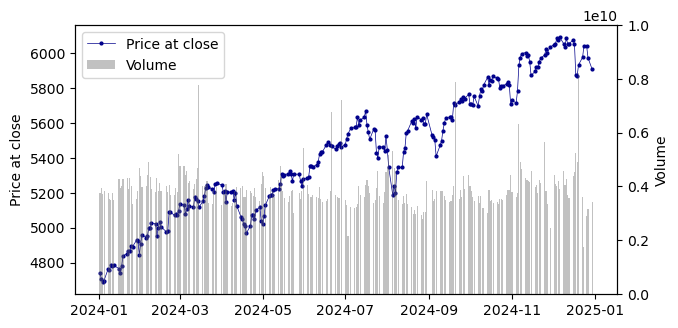

In [132]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, 1, figsize=(7,3.5))

# Plot closing price
price = ax.plot(daily.index, daily['Close'], color='darkblue', marker='o', ms=2, lw=0.5)
ax.set_ylabel('Price at close')

# Create secondary y-axis for trading volume
ax2 = ax.twinx()

# Plot trading volume as bar chart
volume = ax2.bar(daily.index, daily['Volume'], color='#666666', alpha=0.4, zorder=-1, lw=0)
ax2.set_ylim((0.0, 1.0e10))
ax2.set_ylabel('Volume')

# Add legend using handles returned by plot() and bar()
ax.legend([price[0], volume[0]], ['Price at close', 'Volume'])

The above code uses 
[`twinx()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html)
to create a second (invisible) $x$-axis with an independent $y$-axis which allows us to plot the trading volume on a different scale.

*Example: Retrieving data for multiple symbols*

We can download trading data for multiple symbols at once using the `download()` function. Unlike the `Ticker` class, this immediately returns a `DataFrame` containing data similar to the `history` method we called previously, but now the column index contains an additional level for each ticker symbol. 

For example, to get the trading data for Amazon and Microsoft for the last 3 months of 2024, we proceed as follows:

In [139]:
import yfinance as yf

# Ticker symbols for bulk download
tickers = 'AMZN', 'NVDA'

# Start date for data download
start = '2024-10-01'

# End date for data download
end = '2024-12-31'

# Get data for Amazon (AMZN) and Microsoft (MSFT) for first quarter of 2023
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  2 of 2 completed


In [140]:
# Inspect first few rows
data.head(2)

Price            Close                    High                     Low  \
Ticker            AMZN        NVDA        AMZN        NVDA        AMZN   
Date                                                                     
2024-10-01  185.130005  116.991936  186.190002  122.431563  183.449997   
2024-10-02  184.759995  118.841812  186.600006  119.371774  184.039993   

Price                         Open                Volume             
Ticker            NVDA        AMZN        NVDA      AMZN       NVDA  
Date                                                                 
2024-10-01  115.782020  184.899994  121.761604  36044900  302094500  
2024-10-02  115.132069  184.440002  116.431982  23704100  221845900

To extract data for a particular symbol, we have to take into account the hierarchical column index:

In [141]:
# Use hierarchical indexing to get data for Amazon
data[('Close', 'AMZN')].head()

Date
2024-10-01    185.130005
2024-10-02    184.759995
2024-10-03    181.960007
2024-10-04    186.509995
2024-10-07    180.800003
Name: (Close, AMZN), dtype: float64

To illustrate how this data can be used, we plot the daily returns for Amazon and Microsoft below:

<Axes: xlabel='Date', ylabel='Daily returns (%)'>

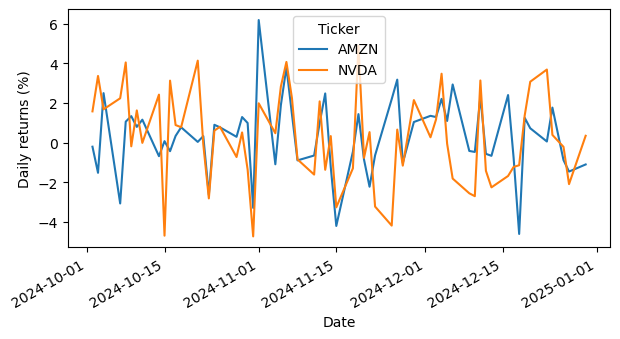

In [144]:
# Plot daily returns for both stocks
returns = data['Close'].pct_change() * 100.0
returns.plot(y=['AMZN', 'NVDA'], ylabel='Daily returns (%)', figsize=(7, 3.5))

In [137]:
ticker = yf.Ticker('AAPL')

# Get historical data for Apple Inc. (AAPL) for 2025
data = ticker.history(start='2025-01-01', end='2025-12-31')